# Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

So we have to build a machine learning model to predict the price of the flight ticket. 

In [1]:
    import pandas as pd 
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

    import warnings
    warnings.filterwarnings('ignore')

In [143]:
data = pd.read_excel('Data_Train.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [144]:
df = pd.read_excel('Test_set.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [145]:
data['DATES_OF_JOURNEY'] = pd.to_datetime(data['Date_of_Journey'], format = "%d/%m/%Y")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATES_OF_JOURNEY
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019-04-09
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019-04-27
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019-04-27
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019-03-01


In [146]:
data['Day'] = data['DATES_OF_JOURNEY'].dt.day
data['Month'] = data['DATES_OF_JOURNEY'].dt.month
data['Year']  = data['DATES_OF_JOURNEY'].dt.year
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DATES_OF_JOURNEY,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019-04-09,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019-04-27,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019-04-27,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019-03-01,1,3,2019


# as the dates are all in the year of 2019 so we can drop year columns from the dataset and some columns that are unwanted ,dropped too

In [147]:
data = data.drop(['Date_of_Journey','DATES_OF_JOURNEY','Year'],axis=1)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [148]:
# Now same with the testing data

In [149]:
df['DATES_OF_JOURNEY'] = pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%Y")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,DATES_OF_JOURNEY
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019-06-06
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019-05-12
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019-05-21
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019-05-21
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019-06-24
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,2019-06-06
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,2019-03-27
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,2019-03-06
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,2019-03-06


In [150]:
df['Day'] = df['DATES_OF_JOURNEY'].dt.day
df['Month'] = df['DATES_OF_JOURNEY'].dt.month
df['Year']  = df['DATES_OF_JOURNEY'].dt.year
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,DATES_OF_JOURNEY,Day,Month,Year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019-06-06,6,6,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019-05-12,12,5,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019-05-21,21,5,2019
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019-05-21,21,5,2019
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019-06-24,24,6,2019


In [151]:
df = df.drop(['Date_of_Journey','DATES_OF_JOURNEY','Year'],axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [152]:
print(data.shape)
print(df.shape)

(10683, 12)
(2671, 11)


Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


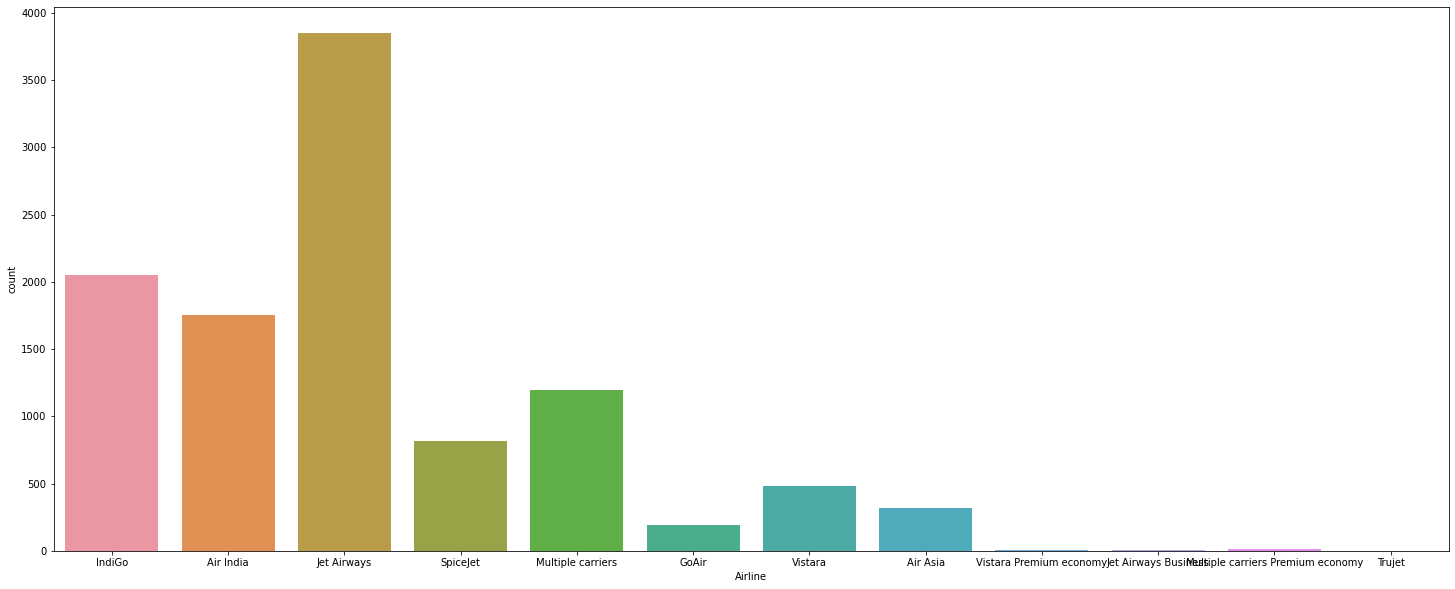

In [10]:
plt.figure(figsize=(25,10))
sns.countplot(data['Airline'])
print(data['Airline'].value_counts())

Jet Airways has the maximum no of flights which used by customers

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


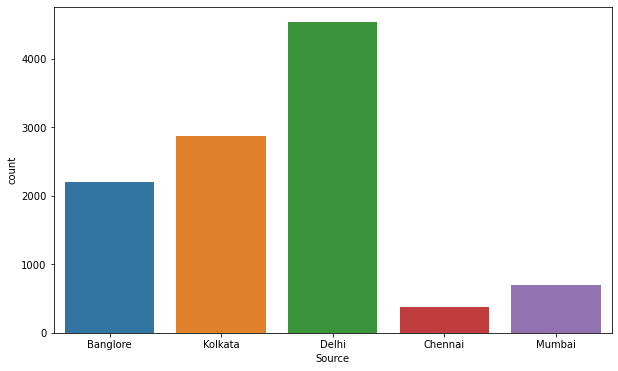

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data['Source'])
print(data['Source'].value_counts())

Delhi is the buisest source for Flight departure

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


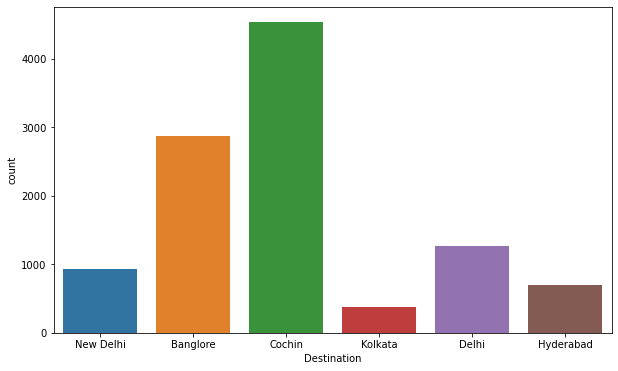

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data['Destination'])
print(data['Destination'].value_counts())

Cochin is busisest Destination amongst all followed by bangalore

In [16]:
print(data['Route'].value_counts())

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64


DEL TO BOM TO COK is the busiest route for the flights

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


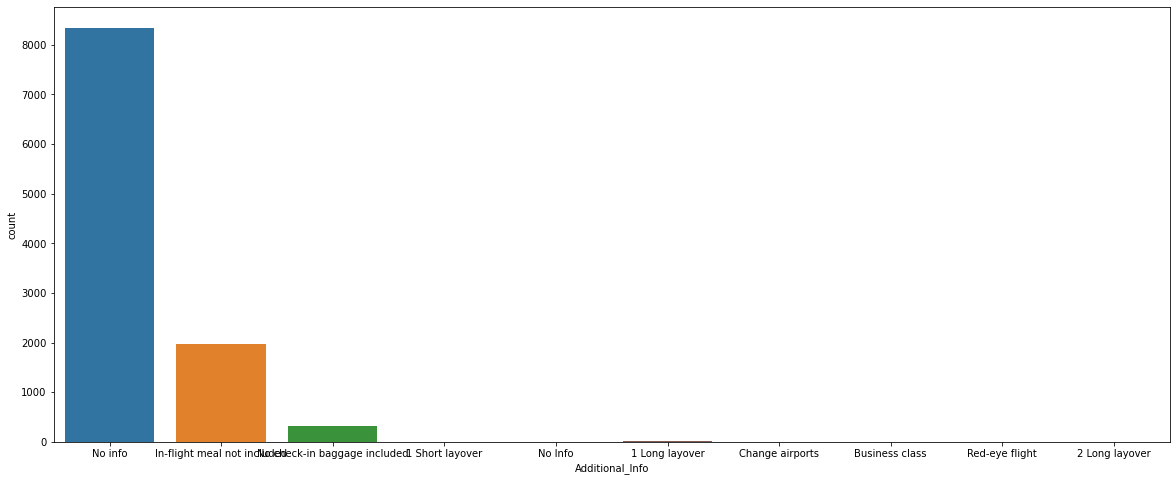

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(data['Additional_Info'])
print(data['Additional_Info'].value_counts())

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


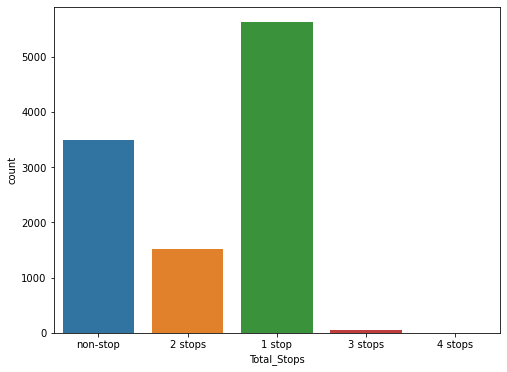

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(data['Total_Stops'])
print(data['Total_Stops'].value_counts())

There are Max flights which have only 1 stop from SOurce to Destination

In [24]:
print(data['Duration'].value_counts())

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64


In [26]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

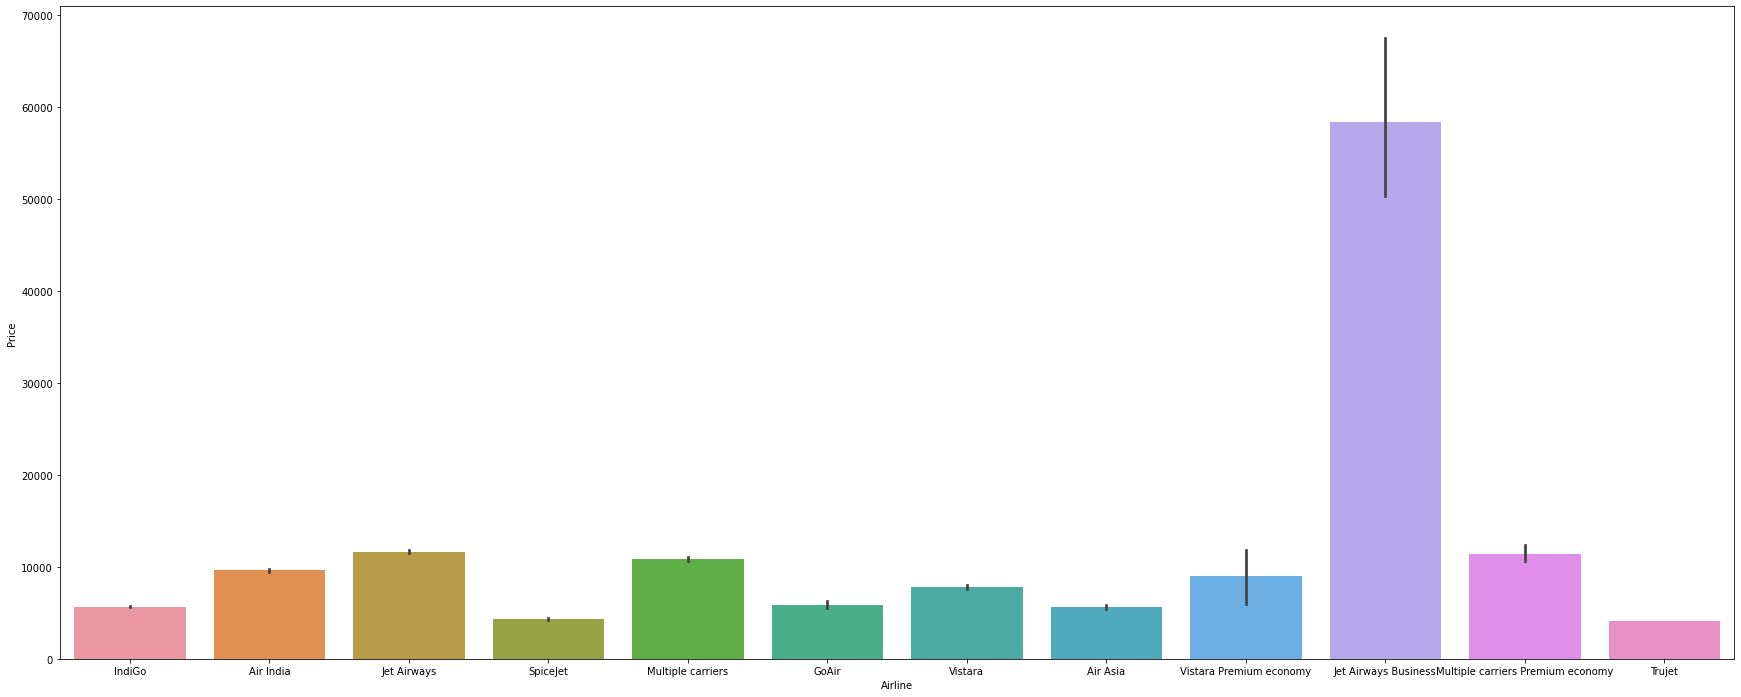

In [34]:
plt.figure(figsize=(30,12))
sns.barplot(x='Airline',y='Price',data=data)

Jet Airways Buisness has the highest fairs of the flights as it is Buisness class but his flight is taken by a very few people(only6)
but after that the Jet airways having Good price fair

<AxesSubplot:xlabel='Airline', ylabel='Price'>

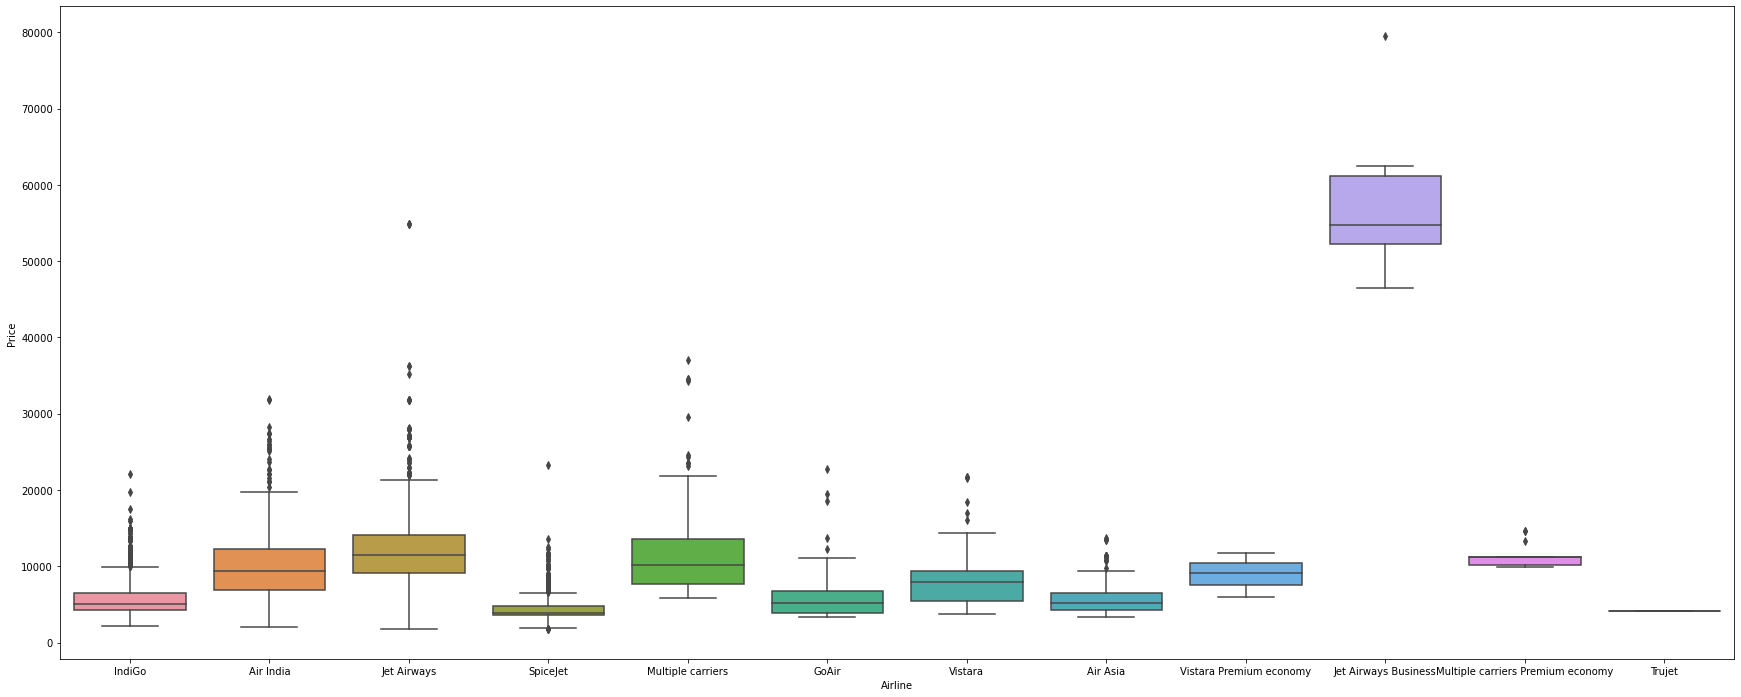

In [36]:
plt.figure(figsize=(30,12))
sns.boxplot(x='Airline',y='Price',data=data)

 Jet airways looks mosty frequent airline in the dataset having biggest price range

<AxesSubplot:xlabel='Source', ylabel='Price'>

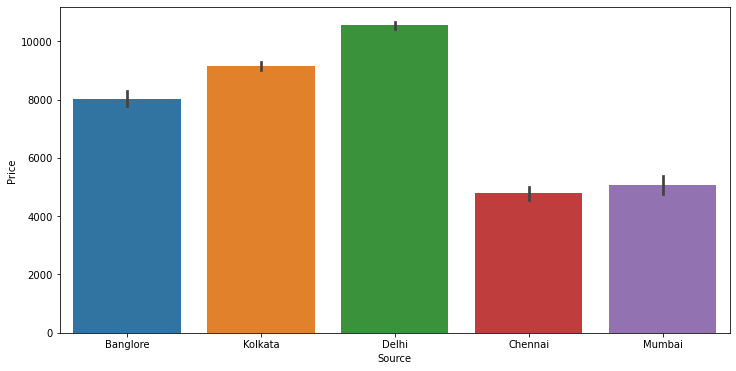

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='Source',y='Price',data=data)

The customer which departs from DELHI souce has max Price Fair

<AxesSubplot:xlabel='Destination', ylabel='Price'>

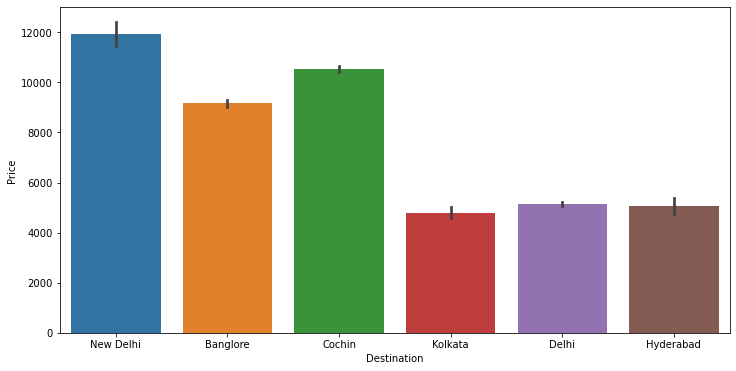

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x='Destination',y='Price',data=data)

The Customer whose  Destination is New Delhi have more Fair Price

In [153]:
data = data.drop(['Dep_Time','Arrival_Time'],axis=1)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3


In [154]:
df = df.drop(['Dep_Time','Arrival_Time'],axis=1)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6


In [155]:
data['Total_Stops'] = data['Total_Stops'].fillna('1 stop')

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
le = LabelEncoder()
var_mode = ['Airline','Source','Destination','Route','Total_Stops','Additional_Info','Duration']

for i in var_mode:
    data[i] = le.fit_transform(data[i])

In [158]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,3,0,5,18,240,4,8,3897,24,3
1,1,3,0,84,336,1,8,7662,1,5
2,4,2,1,118,106,1,8,13882,9,6
3,3,3,0,91,311,0,8,6218,12,5
4,3,0,5,29,303,0,8,13302,1,3
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,236,4,8,4107,9,4
10679,1,3,0,64,237,4,8,4145,27,4
10680,4,0,2,18,280,4,8,7229,27,4
10681,10,0,5,18,238,4,8,12648,1,3


In [159]:
le = LabelEncoder()
var_mode = ['Airline','Source','Destination','Route','Total_Stops','Additional_Info','Duration']

for i in var_mode:
    df[i] = le.fit_transform(df[i])

In [160]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month
0,4,2,1,76,10,0,5,6,6
1,3,3,0,65,248,0,5,12,5
2,4,2,1,76,148,0,3,21,5
3,6,2,1,76,36,0,5,21,5
4,0,0,2,16,216,4,5,24,6


In [71]:
# since it is all categorical data so we are not checking skewness and outliers


In [161]:
data.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month
Airline,1.000000,-0.013401,0.018479,0.025039,0.027917,0.036064,-0.060802,-0.039520,0.026238,0.024643
Source,-0.013401,1.000000,-0.592574,0.403378,-0.192009,-0.225601,-0.022107,0.015998,0.004898,0.183268
Destination,0.018479,-0.592574,1.000000,-0.461169,0.022037,0.337883,0.026806,-0.071112,-0.040998,-0.364686
Route,0.025039,0.403378,-0.461169,1.000000,-0.062111,-0.437802,0.035216,0.164085,0.081501,0.244195
Duration,0.027917,-0.192009,0.022037,-0.062111,1.000000,0.175207,0.080151,-0.144270,0.016523,-0.032774
Total_Stops,0.036064,-0.225601,0.337883,-0.437802,0.175207,1.000000,0.164009,-0.571174,0.029290,-0.026346
Additional_Info,-0.060802,-0.022107,0.026806,0.035216,0.080151,0.164009,1.000000,-0.065478,-0.016337,-0.051478
Price,-0.039520,0.015998,-0.071112,0.164085,-0.144270,-0.571174,-0.065478,1.000000,-0.153738,-0.103651
Day,0.026238,0.004898,-0.040998,0.081501,0.016523,0.029290,-0.016337,-0.153738,1.000000,-0.038378
Month,0.024643,0.183268,-0.364686,0.244195,-0.032774,-0.026346,-0.051478,-0.103651,-0.038378,1.000000


<AxesSubplot:>

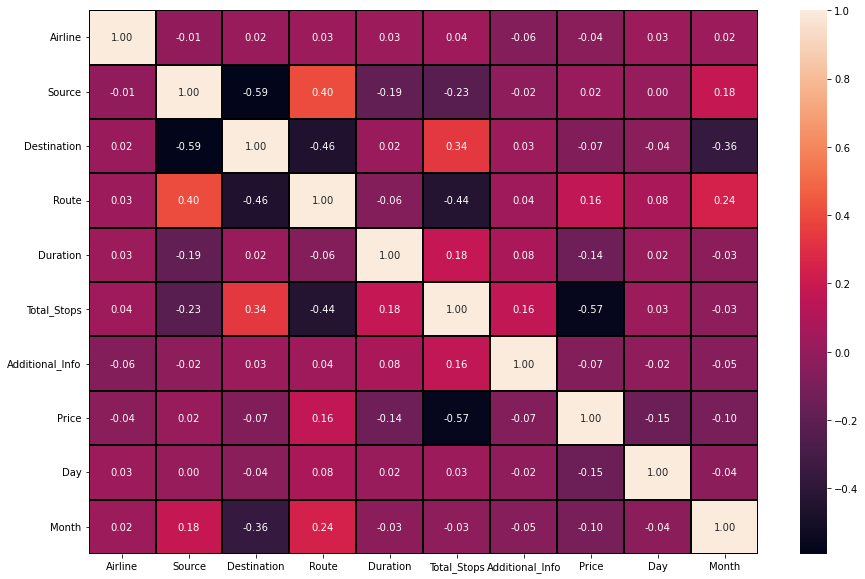

In [162]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,linewidth = 0.2,linecolor = 'black',fmt='0.2f')

there are no cloumns that are highly correlated


In [163]:
# seprating the columns into features and target
x= data.drop("Price",axis=1)
y= data["Price"]

In [164]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)

In [165]:
from sklearn.linear_model import LinearRegression
lrc = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

In [179]:
lrc.fit(x_train,y_train)

LinearRegression()

In [180]:
pred_test = lrc.predict(x_test)

In [181]:
print(r2_score(y_test,pred_test))

0.3962472681006838


In [182]:
from sklearn.model_selection import cross_val_score

In [183]:
for j in range(3,10):
    cv_score = cross_val_score(lrc,x,y,cv=j)
    cv_mean = cv_score.mean()
    print("The accuracy of the model is ",cv_score.mean(),"at CV is", j)
    
     

The accuracy of the model is  0.3731806730434258 at CV is 3
The accuracy of the model is  0.37346356093283206 at CV is 4
The accuracy of the model is  0.37291547182771845 at CV is 5
The accuracy of the model is  0.3734884869136111 at CV is 6
The accuracy of the model is  0.3737875221886661 at CV is 7
The accuracy of the model is  0.3736800535706715 at CV is 8
The accuracy of the model is  0.3741918649374464 at CV is 9


In [184]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,pred_test)
R2

0.3962472681006838

In [185]:
from sklearn import metrics

In [186]:
MAE = metrics.mean_absolute_error(y_test,pred_test)
MSE = metrics.mean_squared_error(y_test,pred_test)

In [187]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 2610.644270332451
mean squared error: 12164195.452843536


In [188]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 3487.720667261576


In [189]:
# now chk with the random forest
from sklearn.ensemble import RandomForestRegressor

In [190]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=15)

# Fitting the model on our trained dataset.
RF.fit(x_train,y_train)

# Making Predictions
y_pred = RF.predict(x_test)

In [191]:
print(r2_score(y_test,y_pred))

0.6859374020203268


In [192]:
scr_rf = cross_val_score(RF,x,y,cv=3)
print("Cross Validation Score of random forest model is :-",scr_rf.mean())

Cross Validation Score of random forest model is :- 0.6316643216560607


In [112]:
# so as WITH LASSO

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(2,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 2}


In [195]:
ls = Lasso(alpha=1,random_state=2)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

In [196]:
lss = r2_score(y_test,pred_ls)
lss

0.396278834054445

In [197]:
cv_score = cross_val_score(ls,x,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.3731810843257797

In [198]:
# with adaboost

In [199]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [200]:
params = {'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]}

In [201]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=3,param_distributions=params)

In [202]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=3,param_distributions=params)

In [203]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [213]:
ada = AdaBoostRegressor(learning_rate=0.25,n_estimators=87)

In [214]:
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.25, n_estimators=87)

In [215]:
y_pred = ada.predict(x_test)

print(r2_score(y_test,y_pred))

0.451328293005795


In [216]:
scr_ada = cross_val_score(ada,x,y,cv=3)
print("Cross Validation Score of adaboost model is :-",scr_ada.mean())

Cross Validation Score of adaboost model is :- 0.44026904170361664


In [129]:
# SO CLEARLY WITH RANDOM FOREST THE MODEL PERFORM VERY WELL 

In [130]:
# BUT BEFORE USED HYPERPARAMETER TUNING WITH GRIDSEARCHCV

In [217]:
from sklearn.model_selection import GridSearchCV

In [218]:
parameters = {'max_depth':range(2,4),'min_samples_leaf':range(2,4),'min_samples_split':range(2,4),'n_estimators':[20,30,60,80]}

clf = GridSearchCV(RF,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}


In [219]:
RF = RandomForestRegressor(max_depth= 4, min_samples_leaf=4, min_samples_split= 8, n_estimators= 20)

In [220]:
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=20)

In [221]:
y_pred = RF.predict(x_test)

In [222]:
print("ACCURACY",r2_score(y_test,y_pred))

ACCURACY 0.6362438817228807


In [229]:
# saving the model for later prediction
import pickle

In [224]:
filename = 'RAIN TOMORROW.pickle'
pickle.dump(RF,open(filename,'wb'))

In [225]:
#hence my model is ready to predict

we have some testing dataset lets try with some data and trying to get the prices

In [226]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month
0,4,2,1,76,10,0,5,6,6
1,3,3,0,65,248,0,5,12,5
2,4,2,1,76,148,0,3,21,5
3,6,2,1,76,36,0,5,21,5
4,0,0,2,16,216,4,5,24,6
...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,150,0,5,6,6
2667,3,3,0,43,213,4,5,27,3
2668,4,2,1,76,278,0,5,6,3
2669,1,2,1,76,60,0,5,6,3


In [228]:
# prediction using from the saved model 

In [230]:
load_model = pickle.load(open(filename,'rb'))

# LETS TAKE 5 SAMPLES FROM TESTING DATA AND PREDICT THEIR PRICES

In [241]:
a1 = load_model.predict([[3,3,0,65,248,0,5,12,5]])
a1

array([11181.64170611])

In [243]:
b4 = load_model.predict([[0,0,2,16,216,4,5,24,6]])
b4

array([6506.08915895])

In [249]:
c2666 = load_model.predict([[1,3,0,51,150,0,5,6,6]])
c2666

array([11582.41945573])

In [250]:
b2670 = load_model.predict([[6,2,1,76,49,0,5,15,6]])
b2670


array([11181.64170611])

In [252]:
b2667 = load_model.predict([[3,3,0,43,213,4,5,27,3]])
b2667

array([6506.08915895])

# hence my model is ready to predict the price